In [3]:
import pandas as  pd


In [4]:
uri = 'https://raw.githubusercontent.com/alura-cursos/machine-learning-algoritmos-nao-supervisionados/master/movies.csv'
filmes = pd.read_csv(uri)

In [7]:
filmes.columns = ['filmes_id','titulo','generos' ]

In [10]:
generos = filmes.generos.str.get_dummies()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [15]:
generos_escalados = scaler.fit_transform(generos)

In [17]:
generos_escalados.shape

(9742, 20)

In [18]:
from sklearn.cluster import KMeans

In [37]:
modelo = KMeans(n_clusters=3)

modelo.fit(generos_escalados)

print(f'Grupos{modelo.labels_}')

Grupos[0 0 1 ... 1 0 1]


In [38]:
print(modelo.cluster_centers_)

[[-0.05917995  0.76881213  1.62491658  1.25586269  1.14361055 -0.13511534
  -0.30451417 -0.21096449 -0.58005869  0.99408068 -0.09492563 -0.23936819
   0.57424009  0.18019781 -0.15784101 -0.27971769  0.67689653 -0.2515853
  -0.05541719 -0.05377189]
 [ 0.03718158 -0.3196422  -0.29638571 -0.2200747  -0.18224451  0.24905694
  -0.27491431  0.13342489  0.10242285 -0.18142594 -0.08959578 -0.10824969
  -0.11251862  0.02284971 -0.2201504   0.18958695 -0.19496239 -0.48661325
   0.06061937  0.02889227]
 [-0.05917995  0.3406275  -0.27380692 -0.23519333 -0.26176096 -0.56534273
   0.91733475 -0.21327094  0.10660126 -0.16723244  0.2961725   0.43844299
  -0.07638173 -0.17638272  0.67898956 -0.31600324  0.07330736  1.43790933
  -0.12303544 -0.04095276]]


In [39]:
grupos = pd.DataFrame(modelo.cluster_centers_, columns=generos.columns)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001A838673448>,
      dtype=object)

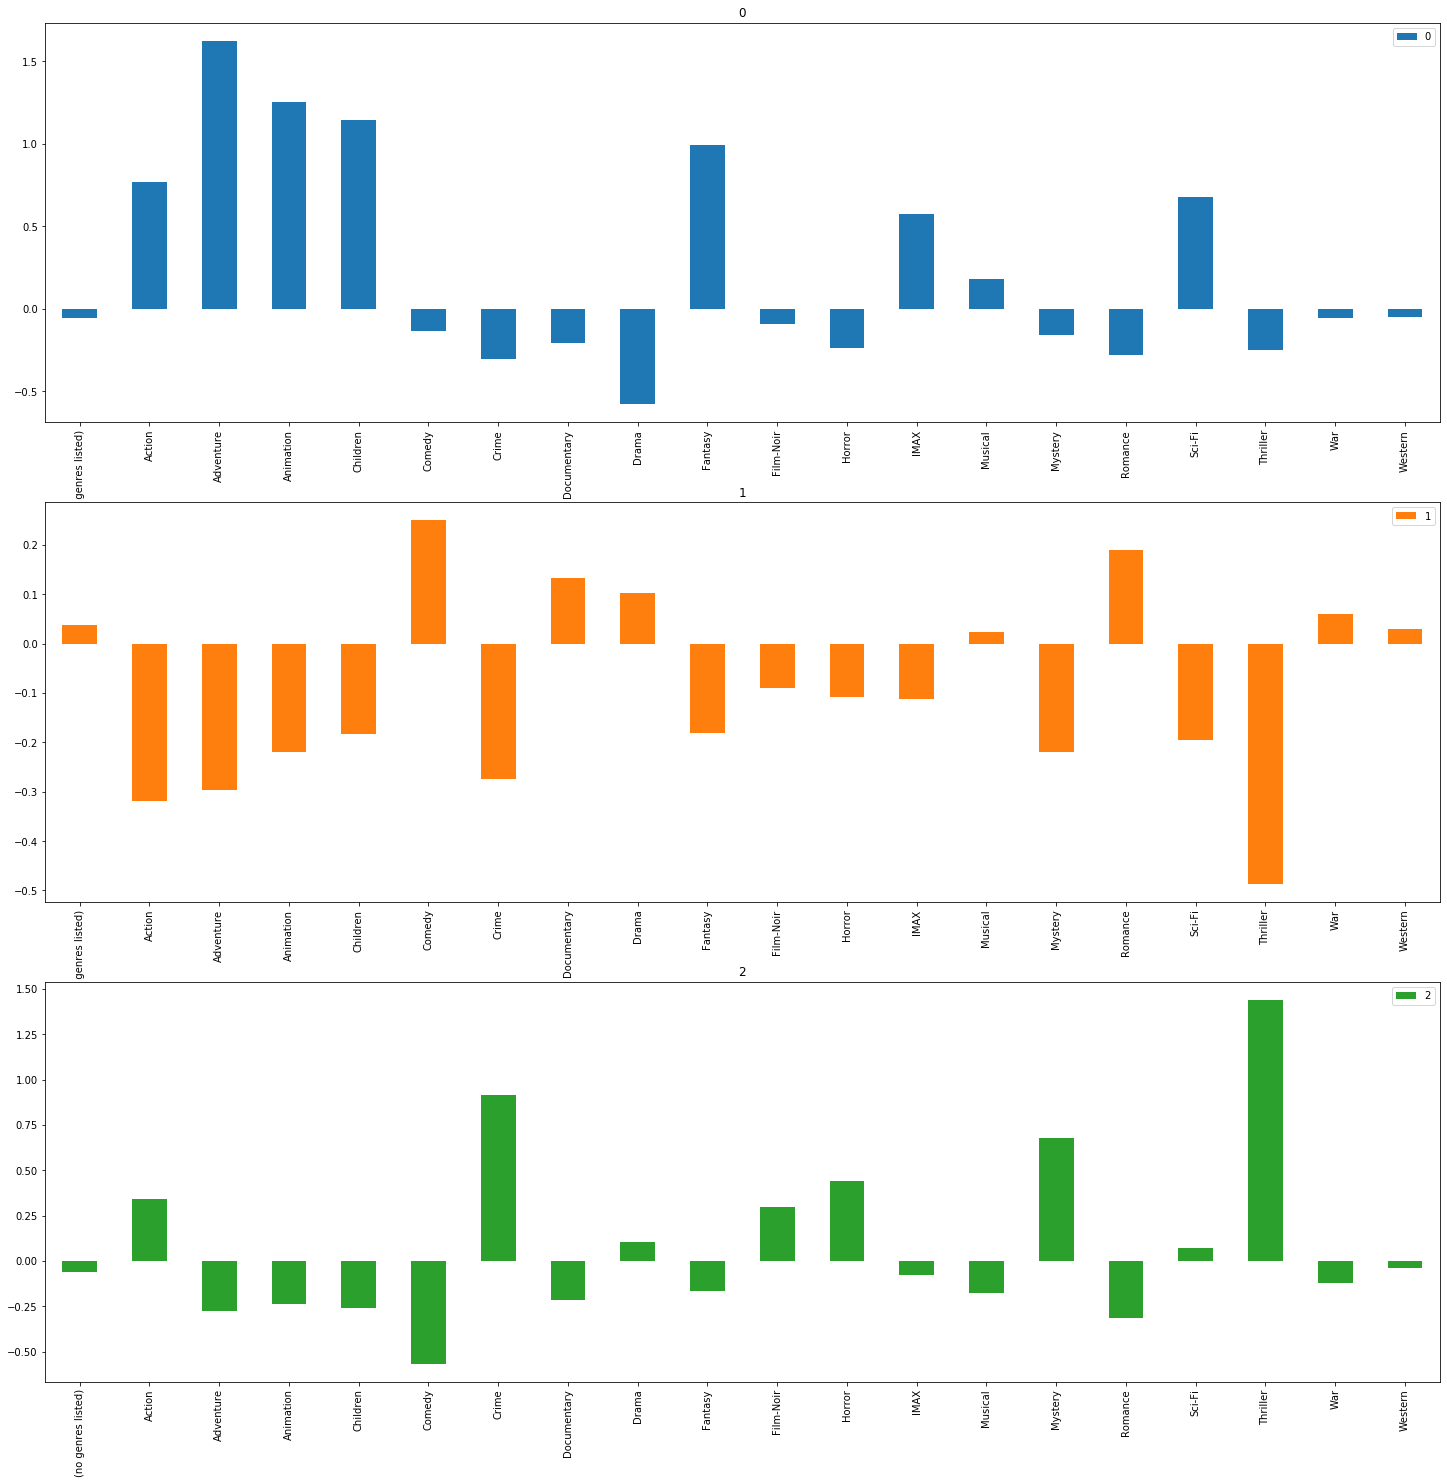

In [40]:

grupos.transpose().plot.bar(subplots=True, figsize=(25,25), sharex=False, )

In [44]:
filtro = modelo.labels_ == 0

dados_dos_filmes[filtro].sample(10)

,filmes_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
1618,2162,"NeverEnding Story II: The Next Chapter, The (1...",Adventure|Children|Fantasy,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
8972,137859,Dragon Ball Z Gaiden: The Plot to Destroy the ...,Action|Adventure|Animation,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1908,2532,Conquest of the Planet of the Apes (1972),Action|Sci-Fi,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
8913,135532,The Last Witch Hunter (2015),Action|Adventure|Fantasy,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4548,6754,Underworld (2003),Action|Fantasy|Horror,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2253,2990,Licence to Kill (1989),Action|Adventure|Thriller,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5766,31193,"Many Adventures of Winnie the Pooh, The (1977)",Animation|Children|Musical,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
8879,134130,The Martian (2015),Adventure|Drama|Sci-Fi,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
721,941,"Mark of Zorro, The (1940)",Adventure,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
580,711,Flipper (1996),Adventure|Children,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
from sklearn.manifold import TSNE

In [50]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)

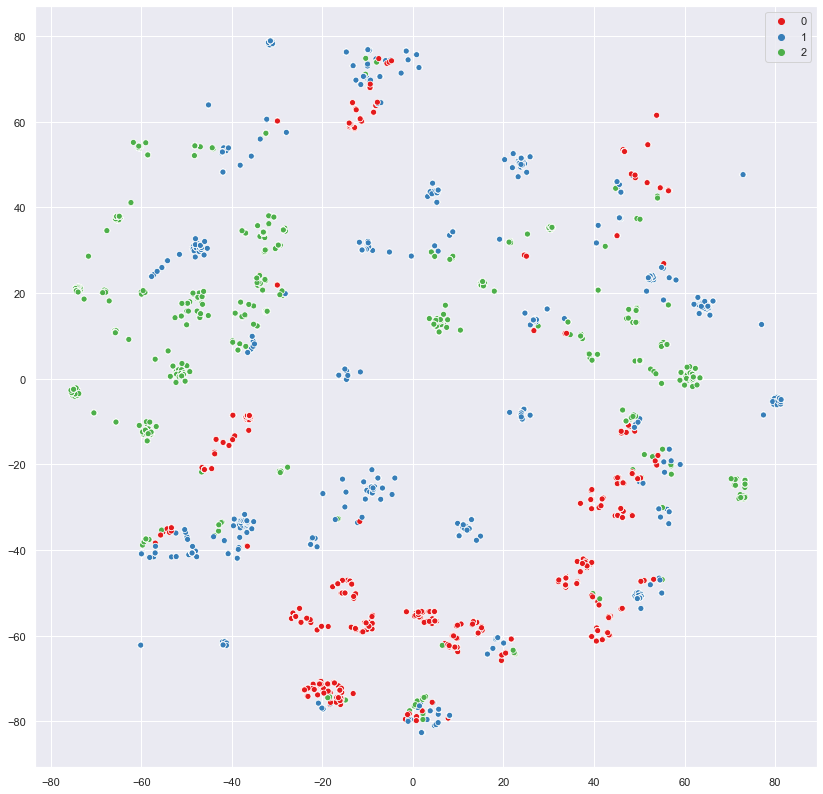

In [58]:
#Reduçao de dimensão, perda de informaçóes
import seaborn as sns
sns.set(rc={'figure.figsize':(14,14)})

sns.scatterplot(x=visualizacao[:,0], y=visualizacao[:,1],hue=modelo.labels_, palette='Set1')